## Edge, vertex, and network attributes

In [54]:
library(igraph)
load("createnetworks.var")   # load the previously saved variables
# adjust these numbers according your taste,
# the default plotting sizes are too big in my browser
options(repr.plot.width=8, repr.plot.height=4) 

In [55]:
E(g4) # The edges of the object

+ 4/4 edges from ef88769 (vertex names):
[1] John->Jim  Jim ->Jack Jim ->Jack John->John

In [56]:
V(g4) # The vertices of the object

+ 7/7 vertices, named, from ef88769:
[1] John     Jim      Jack     Jesse    Janis    Jennifer Justin  

In [57]:
g4[] #You can also examine the network matrix directly:

7 x 7 sparse Matrix of class "dgCMatrix"
         John Jim Jack Jesse Janis Jennifer Justin
John        1   1    .     .     .        .      .
Jim         .   .    2     .     .        .      .
Jack        .   .    .     .     .        .      .
Jesse       .   .    .     .     .        .      .
Janis       .   .    .     .     .        .      .
Jennifer    .   .    .     .     .        .      .
Justin      .   .    .     .     .        .      .

In [58]:
g4[1,]

John      Jim     Jack    Jesse    Janis Jennifer   Justin 
       1        1        0        0        0        0        0

In [59]:
V(g4)$name # automatically generated when we created the network.

[1] "John"     "Jim"      "Jack"     "Jesse"    "Janis"    "Jennifer" "Justin"

In [60]:
V(g4)$gender <- c("male", "male", "male", "male", "female", "female", "male")
E(g4)$type <- "email" # Edge attribute, assign "email" to all edges
E(g4)$weight <- 10    # Edge weight, setting all existing edges to 10

In [61]:
edge_attr(g4)

$type
[1] "email" "email" "email" "email"

$weight
[1] 10 10 10 10

In [62]:
vertex_attr(g4)

$name
[1] "John"     "Jim"      "Jack"     "Jesse"    "Janis"    "Jennifer" "Justin"  

$gender
[1] "male"   "male"   "male"   "male"   "female" "female" "male"

In [63]:
str(graph_attr(g4))

 Named list()


Another way to set attributes (you can similarly use `set_edge_attr()`, `set_vertex_attr()` etc.):

In [64]:
g4 <- set_graph_attr(g4, "name", "Email Network")
g4 <- set_graph_attr(g4, "date of birth", "tomorrow")
graph_attr_names(g4)
graph_attr(g4)

[1] "name"          "date of birth"

$name
[1] "Email Network"

$`date of birth`
[1] "tomorrow"

In [65]:
g4 <- delete_graph_attr(g4, "name")
graph_attr(g4)

$`date of birth`
[1] "tomorrow"

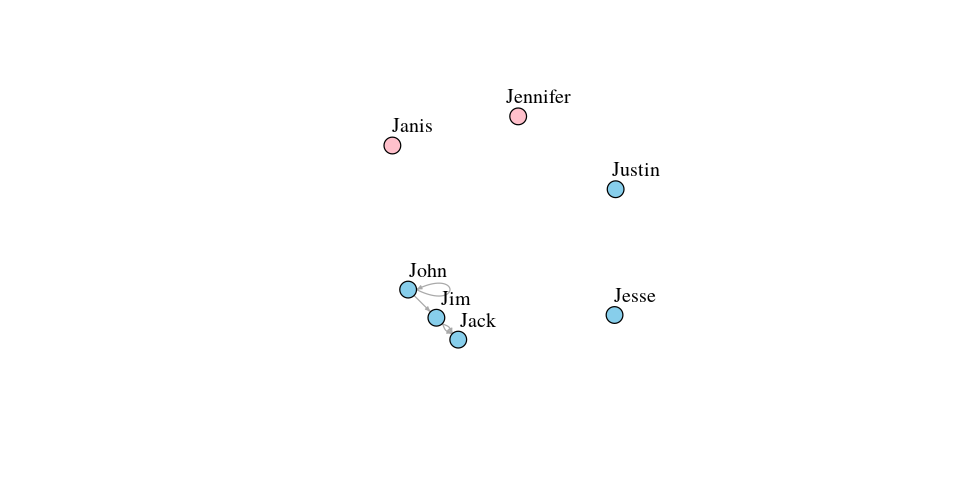

In [66]:
plot(g4, edge.arrow.size=.5, vertex.label.color="black", 
     vertex.label.dist=3.5,
     vertex.color=c( "pink", "skyblue")[1+(V(g4)$gender=="male")] ) 

The graph `g4` has two edges going from Jim to Jack, and a loop from John to himself. We can simplify our graph to remove loops & multiple edges between the same nodes. Use `edge.attr.comb` to indicate how edge attributes are to be combined - possible options include `sum`, `mean`, `prod` (product), `min`, `max`, `first/last` (selects the first/last edge’s attribute). Option “ignore” says the attribute should be disregarded and dropped.

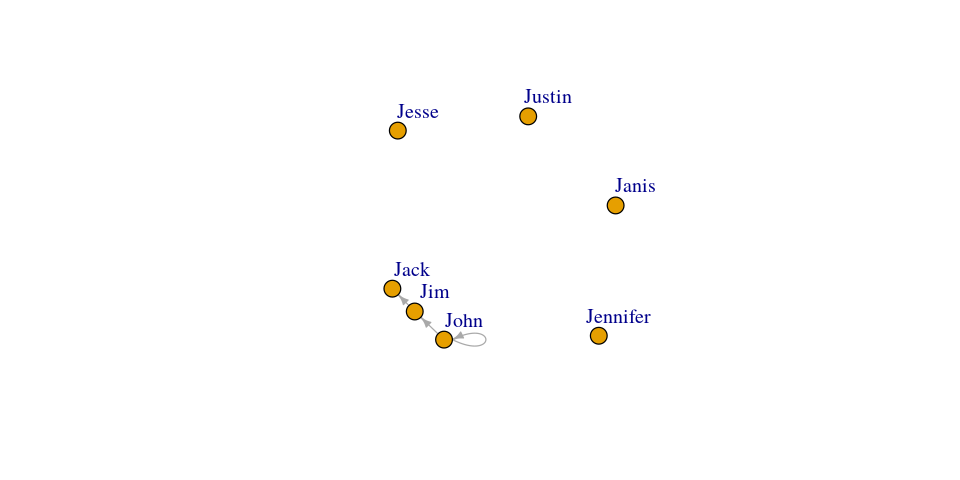

In [68]:
g4s <- simplify( g4, remove.multiple = T, remove.loops = F, 
                 edge.attr.comb=c(weight="sum", type="ignore") )

plot(g4s, vertex.label.dist=3.5)

In [71]:
g4s

IGRAPH 17afa48 DNW- 7 3 -- 
+ attr: date of birth (g/c), name (v/c), gender (v/c), weight (e/n)
+ edges from 17afa48 (vertex names):
[1] John->John John->Jim  Jim ->Jack

The description of an [igraph](http://igraph.org) object starts with up to four letters:
* D or U, for a directed or undirected graph
* N for a named graph (where nodes have a name attribute)
* W for a weighted graph (where edges have a weight attribute)
* B for a bipartite (two-mode) graph (where nodes have a type attribute)

The two numbers that follow refer to the number of nodes and edges in the graph. The description also lists node & edge attributes, for example:
* (g/c) - graph-level character attribute
* (v/c) - vertex-level character attribute
* (e/n) - edge-level numeric attribute


In [ ]:
The two numbers that follow (7 5) refer to the number of nodes and edges in the graph. The description also lists node & edge attributes, for example: